# LDA with 

In [31]:
import pandas as pd

In [34]:
data = pd.read_csv('..data/Eco_hotel.csv')

IOError: File ..data/Eco_hotel.csv does not exist

# PCA with the Labeled Faces in the Wild (LFW) people dataset

In [25]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [2]:
# load the dataset
# the optional parameter: min_faces_per_person: 
# will only retain pictures of people that have at least min_faces_per_person different pictures.
# the optional parameter: resize is the ratio used to resize the each face picture.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [4]:
# for machine learning we use the data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [5]:
X.shape

(1288, 1850)

'Hugo Chavez'

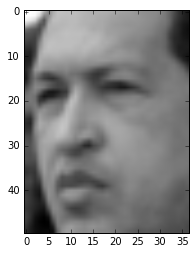

In [10]:
# plot one of the faces
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'George W Bush'

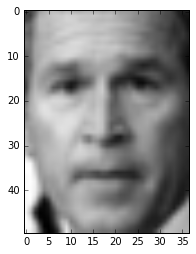

In [11]:
# let's plot another face
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [12]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [14]:
# let's split our dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
# Compute a PCA (eigenfaces) on the face dataset 
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces


In [18]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


In [20]:
# fit without using PCA to see what the difference will be
t0 = time()
logreg = LogisticRegression()
print("Fitting the classifier to the training set WITHOUT PCA")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test)


print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

Fitting the classifier to the training set WITHOUT PCA
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) best estimator
Predicting people's names on the test set
0.810559006211 Accuracy
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.83      0.71      0.76        55
  Donald Rumsfeld       0.62      0.72      0.67        25
    George W Bush       0.87      0.90      0.89       142
Gerhard Schroeder       0.79      0.84      0.81        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.73      0.71      0.72        34

      avg / total       0.81      0.81      0.81       322

[[ 13   1   3   1   0   0   1]
 [  2  39   2   8   0   2   2]
 [ 

In [21]:
# now fit with PCA to see if our accuracy improves
logreg = LogisticRegression()
print("Fitting the classifier to the training set")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

t0 = time()
###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set WITH PCA")
y_pred = clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

Fitting the classifier to the training set
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) best estimator
Predicting people's names on the test set WITH PCA
0.816770186335 Accuracy
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.74      0.76        19
     Colin Powell       0.80      0.75      0.77        55
  Donald Rumsfeld       0.62      0.64      0.63        25
    George W Bush       0.89      0.91      0.90       142
Gerhard Schroeder       0.74      0.84      0.79        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.75      0.71      0.73        34

      avg / total       0.82      0.82      0.82       322

[[ 14   2   2   0   1   0   0]
 [  2  41   2   5   1   1   3]
 [  0 

In [23]:
# Use a pipeline to make this process easier
pca = decomposition.PCA(n_components=150, whiten=True)
logreg = LogisticRegression(C=1e-1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [26]:
cross_val_score(pipe, X, y)

array([ 0.82175926,  0.8372093 ,  0.79812207])

In [27]:
cross_val_score(logreg, X, y)

array([ 0.82175926,  0.82790698,  0.78403756])

In [28]:
# as you can see, while there is a very small difference in accuracy, the time it takes to fit and predict without PCA
# is much 7X longer
t0 = time()
logreg.fit(X, y)
logreg.predict(X)
print (time() - t0), "Seconds"

7.709223032 Seconds


In [29]:
t0 = time()
pipe.fit(X, y)
pipe.predict(X)
print (time() - t0), "Seconds"

1.03333687782 Seconds


In [ ]:
# PCA has helped us reduce the time to fit and predict